In [1]:
import numpy as np
import csv
from matplotlib import pyplot as plt

In [2]:
with open('../size_scalability/THIN/CLOSE/dblis.csv', 'r') as f:
    reader = csv.reader(f)
    data_blis = list(reader)

with open('../size_scalability/THIN/CLOSE/doblas.csv', 'r') as f:
    reader = csv.reader(f)
    data_oblas = list(reader)

with open('../size_scalability/THIN/CLOSE/dmkl.csv', 'r') as f:
    reader = csv.reader(f)
    data_mkl = list(reader)


with open('../size_scalability/THIN/SPREAD/dblis.csv', 'r') as f:
    reader = csv.reader(f)
    s_data_blis = list(reader)

with open('../size_scalability/THIN/SPREAD/doblas.csv', 'r') as f:
    reader = csv.reader(f)
    s_data_oblas = list(reader)

with open('../size_scalability/THIN/SPREAD/dmkl.csv', 'r') as f:
    reader = csv.reader(f)
    s_data_mkl = list(reader)

In [3]:
def PLOT (data): 
    data_array = np.array(data[1:], dtype=float)

    data_per_dimension = np.empty((19, 5, 3))
    j = 0
    for i in range(0,19):
            data_per_dimension[i]=  data_array[j:j+5,:]
            j = j + 5

    method_sd = np.empty((19, 3))
    method = np.empty((19, 3))
    for i in range(0,19):
            method[i]=  np.mean(data_per_dimension[i], axis=0)
            method_sd[i]=  np.std(data_per_dimension[i], axis=0)

    return method, method_sd
    

In [4]:
mkl, std_mkl=PLOT(data_mkl)
oblas, std_oblas=PLOT(data_oblas)
blis, std_blis=PLOT(data_blis)

s_mkl, std_s_mkl=PLOT(s_data_mkl)
s_oblas, std_s_oblas=PLOT(s_data_oblas)
s_blis, std_s_blis=PLOT(s_data_blis)

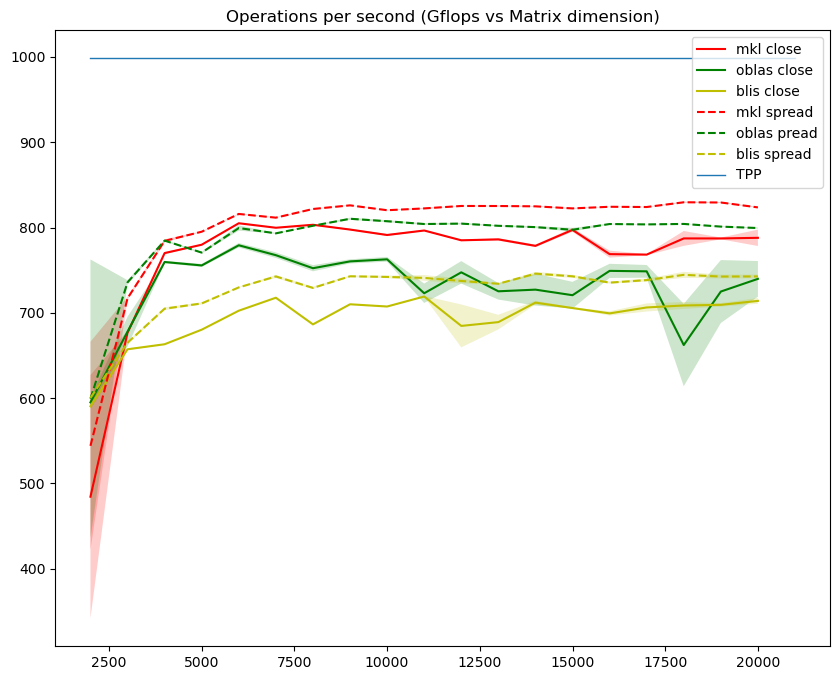

In [5]:
plt.figure(figsize=(10,8))
plt.plot(range(2000,21000,1000), mkl[:,2], color='r', label='mkl close')
#plt.scatter(range(2000,21000,1000), mkl[:,2], color='r')
plt.fill_between(range(2000,21000,1000), mkl[:,2]+std_mkl[:,2], mkl[:,2]-std_mkl[:,2], facecolor='r', alpha=0.2 )

plt.plot(range(2000,21000,1000), oblas[:,2], color='g', label='oblas close')
#plt.scatter(range(2000,21000,1000), oblas[:,2], color='g')
plt.fill_between(range(2000,21000,1000), oblas[:,2]+std_oblas[:,2], oblas[:,2]-std_oblas[:,2], facecolor='g', alpha=0.2 )


plt.plot(range(2000,21000,1000), blis[:,2], color='y', label='blis close')
#plt.scatter(range(2000,21000,1000), blis[:,2], color='y')
plt.fill_between(range(2000,21000,1000), blis[:,2]+std_blis[:,2], blis[:,2]-std_blis[:,2], facecolor='y', alpha=0.2 )


plt.plot(range(2000,21000,1000), s_mkl[:,2], color='r', label='mkl spread', linestyle='dashed')
#plt.scatter(range(2000,21000,1000), s_mkl[:,2], color='r')
plt.fill_between(range(2000,21000,1000), s_mkl[:,2]+std_s_mkl[:,2], s_mkl[:,2]-std_s_mkl[:,2], facecolor='r', alpha=0.2 )


plt.plot(range(2000,21000,1000), s_oblas[:,2], color='g', label='oblas pread', linestyle='dashed')
#plt.scatter(range(2000,21000,1000), s_oblas[:,2], color='g')
plt.fill_between(range(2000,21000,1000), s_oblas[:,2]+std_s_oblas[:,2], s_oblas[:,2]-std_s_oblas[:,2], facecolor='g', alpha=0.2 )


plt.plot(range(2000,21000,1000), s_blis[:,2], color='y', label='blis spread', linestyle='dashed')
#plt.scatter(range(2000,21000,1000), s_blis[:,2], color='y')
plt.fill_between(range(2000,21000,1000), s_blis[:,2]+std_s_blis[:,2], s_blis[:,2]-std_s_blis[:,2], facecolor='y', alpha=0.2 )


x = np.linspace(2000,21000,19)
y = 83.2*12*(x/x)
plt.plot(x, y, label='TPP', linewidth=1)

plt.title("Operations per second (Gflops vs Matrix dimension)")
plt.legend(loc='upper right')
plt.show()
